Cntinuation with extreme magnitude 

In [108]:
from obspy import UTCDateTime, read
from obspy.clients.fdsn import Client
import os, re, numpy as np

###### Save and Plot func

In [3]:
import matplotlib.pyplot as plt

def save_and_show(filename, dpi=300):
    """
    Save the current matplotlib plot to file and display it.
    
    Parameters:
    - filename (str): Name of the file to save
    - dpi (int): Resolution for the saved image (default 300)
    """
    save_dir = "figures"
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, filename)
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    print(f" Saved figure to: {save_path}")
    plt.show()
    plt.close()

#### Rough Download to Visualize Waveform

##### kamchatka 

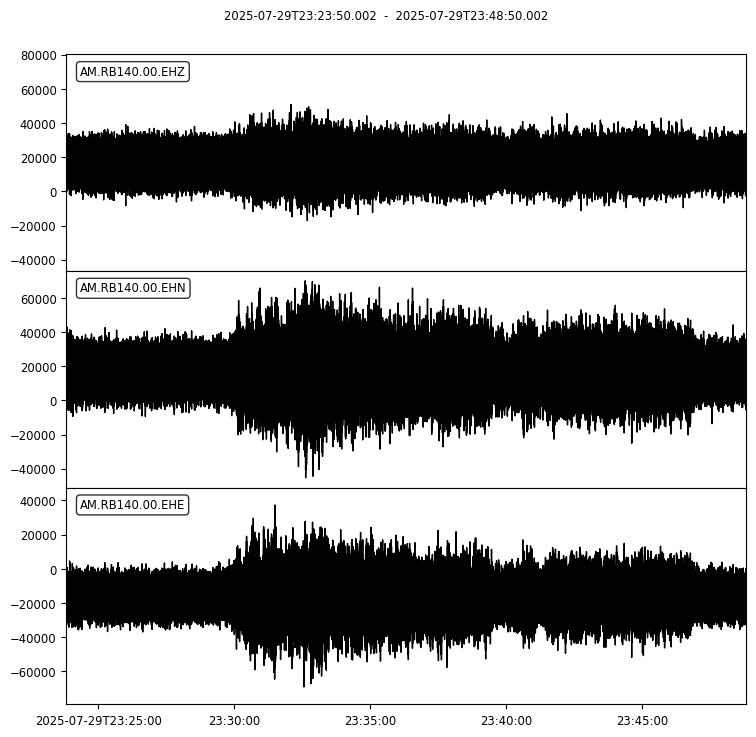

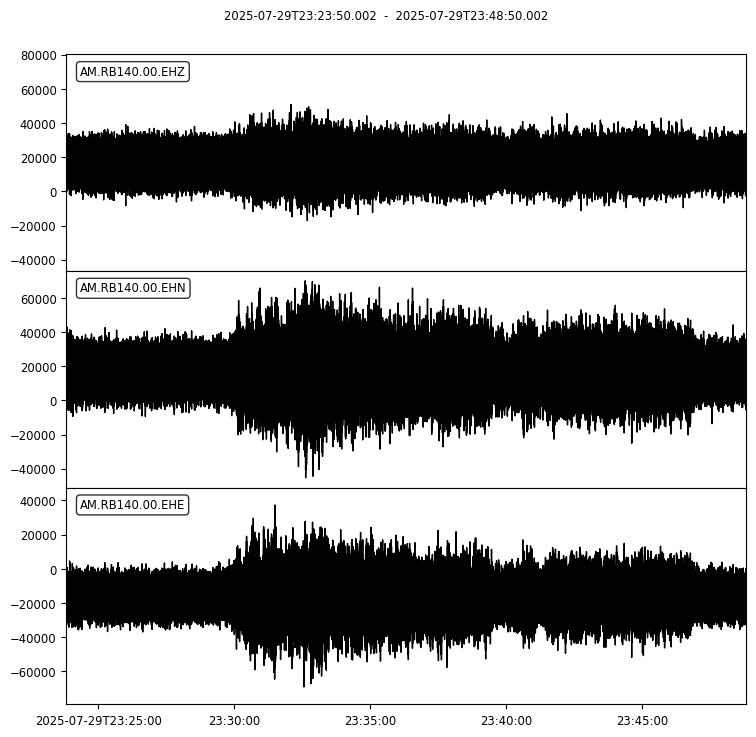

In [5]:

_client = Client("RASPISHAKE")

# Station Info
network = "AM"
station = "RB140"
location = "00"
channels = ["EHZ", "EHE", "EHN"]

# Quake time
eq_time = UTCDateTime("2025-07-29T23:24:50")
start = eq_time - 60  # 1 minute before
end = eq_time + 24 * 60  # 24 minutes after

# Download waveform
st = _client.get_waveforms(network=network, station=station,
                          location=location, channel="EH*", starttime=start, endtime=end)
st.plot()

##### Drake Passage 

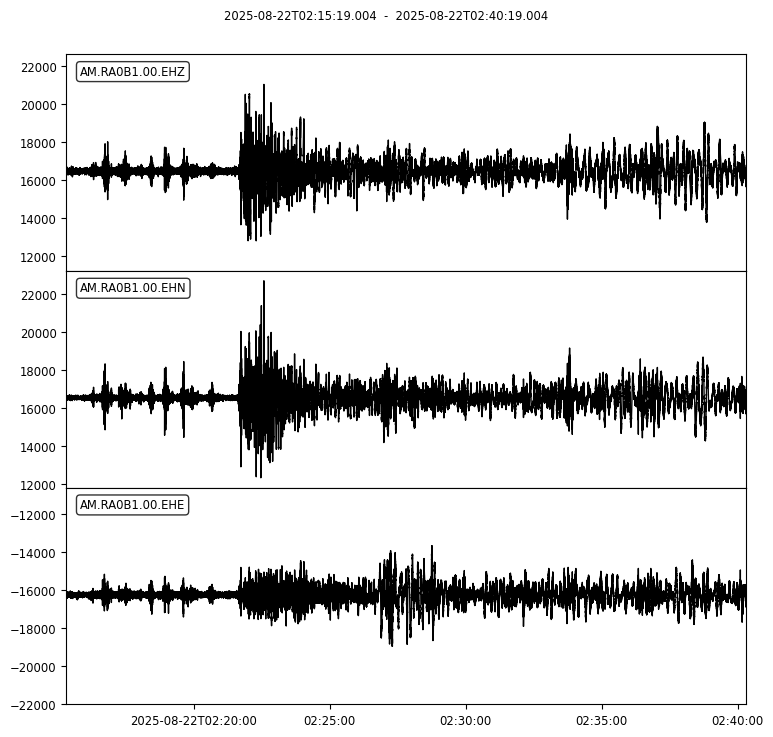

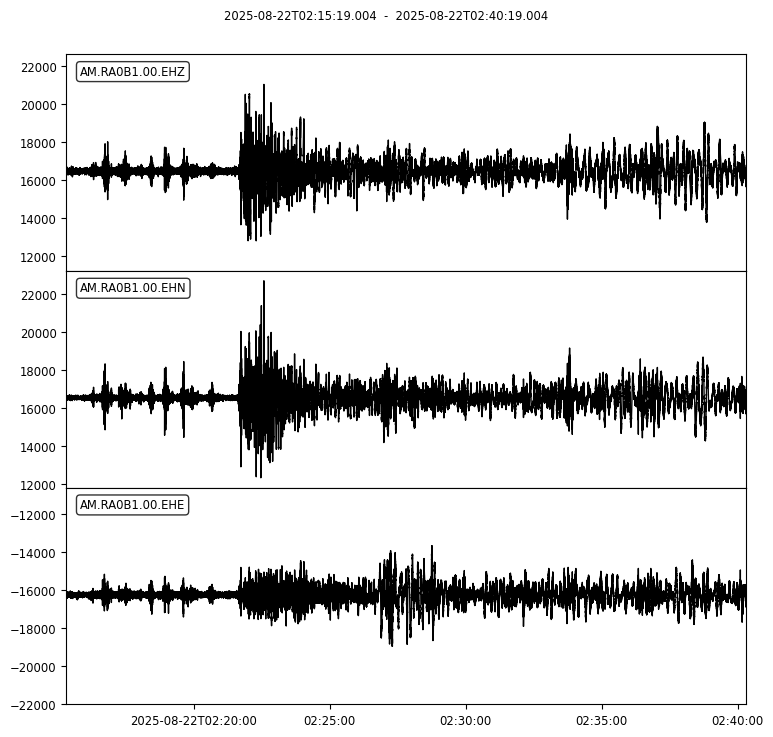

In [57]:
client_ = Client("RASPISHAKE")

# Station Info
network = "AM"
station = "RA0B1"
location = "00"
channels = ["EHZ", "EHE", "EHN"]

# Quake time
eq_time = UTCDateTime("2025-08-22T02:16:19")
start = eq_time - 60  # 1 minute before
end = eq_time + 24 * 60  # 24 minutes after

# Download waveform
st = client_.get_waveforms(network=network, station=station,
                          location=location, channel="EH*", starttime=start, endtime=end)
st.plot()

### Func to Download Waveforms

In [71]:
import os
from obspy import Stream, UTCDateTime
from obspy.clients.fdsn import Client

client = Client("RASPISHAKE")

def earthquake_data_and_save_waveform(station_code, eq_time, save_folder, channels=['EHZ', 'EHE', 'EHN']):
    """
    Download 24 minute waveform data: 1 min before, 24 mins after earthquake time,
    and save the converted (acceleration) to given folder.
    """
    os.makedirs(save_folder, exist_ok=True)

    # Download 25-minute window
    start = eq_time - 60     # 1 min before
    end   = eq_time + 24*60  # 24 mins after

    # Get station metadata (response)
    inventory = client.get_stations(network="AM", station=station_code, level="RESP")

    # Download waveform
    stream = Stream()
    for ch in channels:
        try:
            trace = client.get_waveforms("AM", station_code, "00", ch, start, end)
            stream += trace
        except Exception as e:
            print(f"   Channel {ch} not available for {station_code}: {e}")

    if len(stream) == 0:
        print(f"   No data downloaded for {station_code}")
        return None

    # Convert to acceleration
    stream.attach_response(inventory)
    stream_acc = stream.remove_response(output="ACC", inventory=inventory)

    # Save converted waveform
    time_str = eq_time.strftime("%Y%m%dT%H%M%S")
    fname = f"{station_code}_EQ_{time_str}_25min.mseed"
    save_path = os.path.join(save_folder, fname)
    stream_acc.write(save_path, format="MSEED")
    print(f" Saved 25-min waveform for {station_code} to: {save_path}")

    # Plot 
    stream_acc.plot(title=f"{station_code} waveform (25 min around quake)", size=(800, 600))

    # Trace summary
    print(f"\nTrace Summary for Station {station_code} (25-minute window)")
    for tr in stream_acc:
        print(f"Channel: {tr.stats.channel}")
        print(f"  Sample Rate: {tr.stats.sampling_rate} Hz")
        print(f"  Number of Samples: {tr.stats.npts}")
        print(f"  Start Time: {tr.stats.starttime}")
        print(f"  End Time:   {tr.stats.endtime}")
        print("-" * 40)

    return stream_acc

##### Kamchatka 8.8 Mg EQ

/opt/anaconda3/lib/python3.12/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


 Saved 25-min waveform for RB140 to: EQ_Kamchatka_2025_07_29/RB140_EQ_20250729T232450_25min.mseed


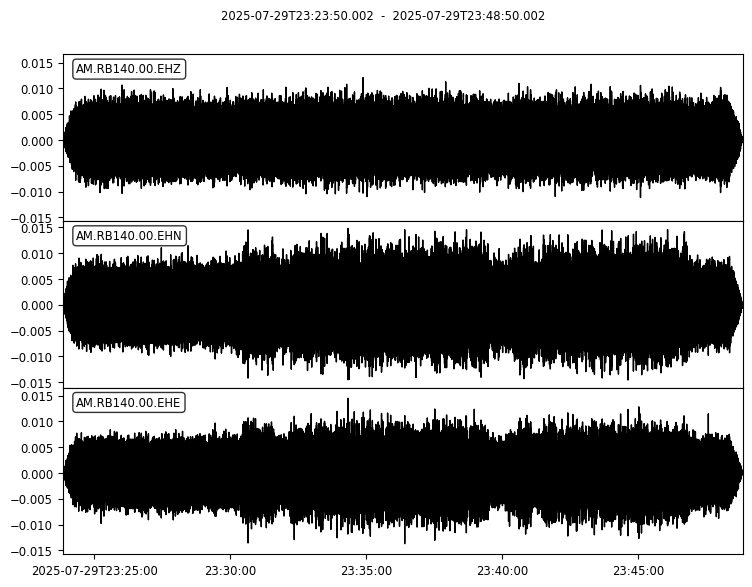


Trace Summary for Station RB140 (25-minute window)
Channel: EHZ
  Sample Rate: 100.0 Hz
  Number of Samples: 150001
  Start Time: 2025-07-29T23:23:50.002000Z
  End Time:   2025-07-29T23:48:50.002000Z
----------------------------------------
Channel: EHE
  Sample Rate: 100.0 Hz
  Number of Samples: 150001
  Start Time: 2025-07-29T23:23:50.002000Z
  End Time:   2025-07-29T23:48:50.002000Z
----------------------------------------
Channel: EHN
  Sample Rate: 100.0 Hz
  Number of Samples: 150001
  Start Time: 2025-07-29T23:23:50.002000Z
  End Time:   2025-07-29T23:48:50.002000Z
----------------------------------------


/opt/anaconda3/lib/python3.12/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


 Saved 25-min waveform for R74A7 to: EQ_Kamchatka_2025_07_29/R74A7_EQ_20250729T232450_25min.mseed


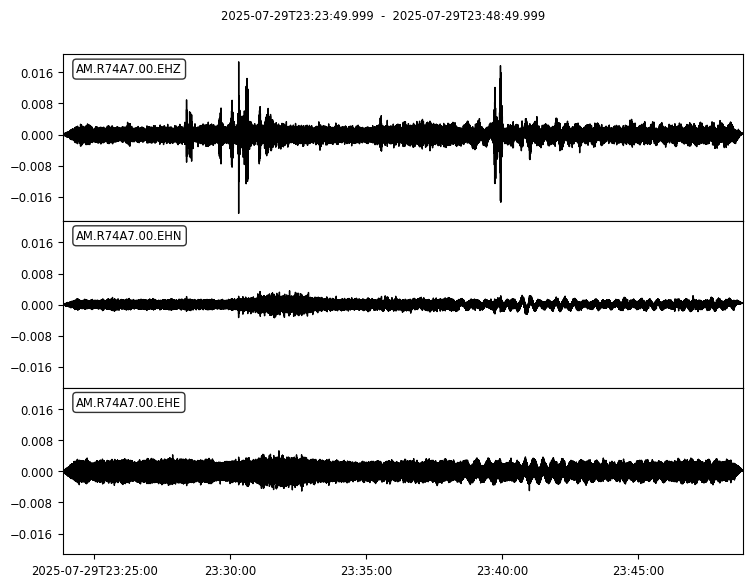


Trace Summary for Station R74A7 (25-minute window)
Channel: EHZ
  Sample Rate: 100.0 Hz
  Number of Samples: 150001
  Start Time: 2025-07-29T23:23:49.999000Z
  End Time:   2025-07-29T23:48:49.999000Z
----------------------------------------
Channel: EHE
  Sample Rate: 100.0 Hz
  Number of Samples: 150001
  Start Time: 2025-07-29T23:23:49.999000Z
  End Time:   2025-07-29T23:48:49.999000Z
----------------------------------------
Channel: EHN
  Sample Rate: 100.0 Hz
  Number of Samples: 150001
  Start Time: 2025-07-29T23:23:49.999000Z
  End Time:   2025-07-29T23:48:49.999000Z
----------------------------------------


/opt/anaconda3/lib/python3.12/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


 Saved 25-min waveform for RF6DC to: EQ_Kamchatka_2025_07_29/RF6DC_EQ_20250729T232450_25min.mseed


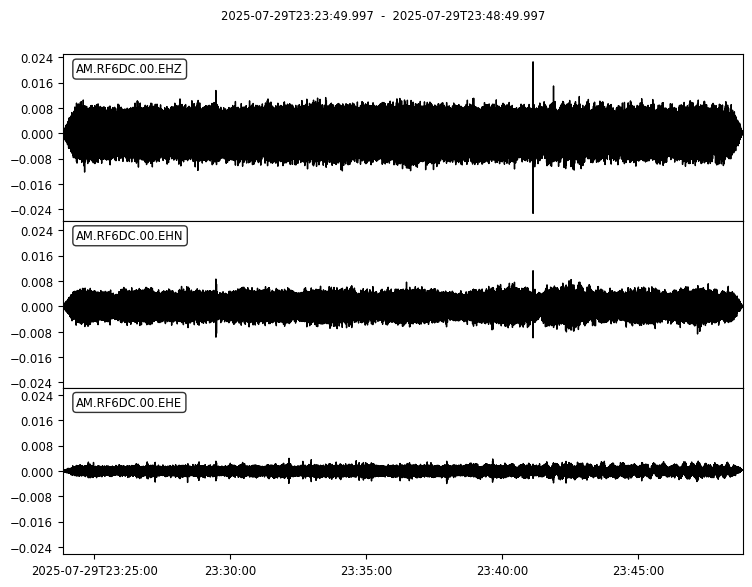


Trace Summary for Station RF6DC (25-minute window)
Channel: EHZ
  Sample Rate: 100.0 Hz
  Number of Samples: 150001
  Start Time: 2025-07-29T23:23:49.997000Z
  End Time:   2025-07-29T23:48:49.997000Z
----------------------------------------
Channel: EHE
  Sample Rate: 100.0 Hz
  Number of Samples: 150001
  Start Time: 2025-07-29T23:23:49.997000Z
  End Time:   2025-07-29T23:48:49.997000Z
----------------------------------------
Channel: EHN
  Sample Rate: 100.0 Hz
  Number of Samples: 150001
  Start Time: 2025-07-29T23:23:49.997000Z
  End Time:   2025-07-29T23:48:49.997000Z
----------------------------------------


In [73]:
# Kamchatka EQ
kamchatka_time = UTCDateTime("2025-07-29T23:24:50")
kamchatka_folder = "EQ_Kamchatka_2025_07_29"
kamchatka_stations = ["RB140", "R74A7", "RF6DC"]

for sta in kamchatka_stations:
    earthquake_data_and_save_waveform(sta, kamchatka_time, kamchatka_folder)

##### Drake Drainage 7.5 Mg EQ

/opt/anaconda3/lib/python3.12/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


 Saved 25-min waveform for R69C4 to: EQ_DrakePassage_2025_08_22/R69C4_EQ_20250822T021619_25min.mseed


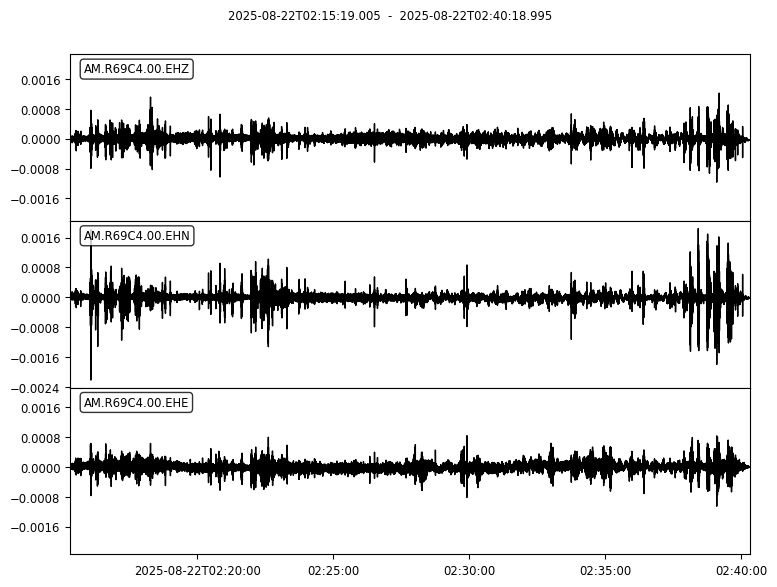


Trace Summary for Station R69C4 (25-minute window)
Channel: EHZ
  Sample Rate: 100.0 Hz
  Number of Samples: 150000
  Start Time: 2025-08-22T02:15:19.005000Z
  End Time:   2025-08-22T02:40:18.995000Z
----------------------------------------
Channel: EHE
  Sample Rate: 100.0 Hz
  Number of Samples: 150000
  Start Time: 2025-08-22T02:15:19.005000Z
  End Time:   2025-08-22T02:40:18.995000Z
----------------------------------------
Channel: EHN
  Sample Rate: 100.0 Hz
  Number of Samples: 150000
  Start Time: 2025-08-22T02:15:19.005000Z
  End Time:   2025-08-22T02:40:18.995000Z
----------------------------------------


/opt/anaconda3/lib/python3.12/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


 Saved 25-min waveform for RA0B1 to: EQ_DrakePassage_2025_08_22/RA0B1_EQ_20250822T021619_25min.mseed


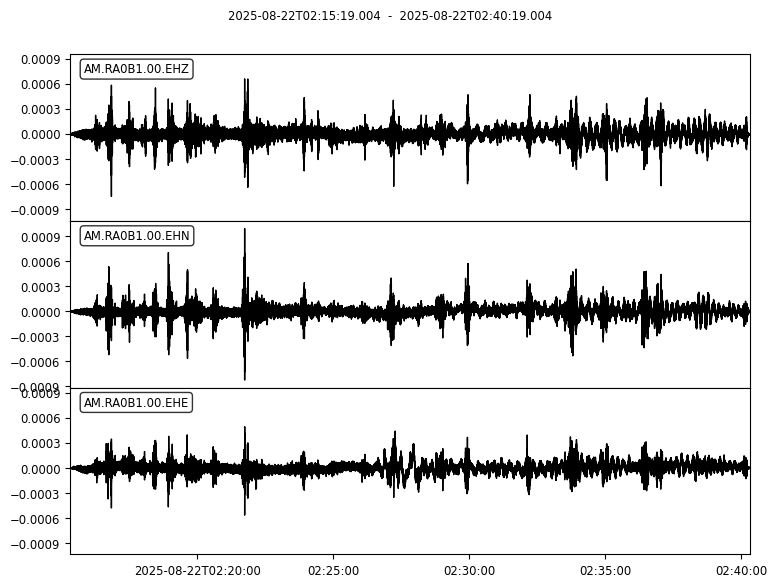


Trace Summary for Station RA0B1 (25-minute window)
Channel: EHZ
  Sample Rate: 100.0 Hz
  Number of Samples: 150000
  Start Time: 2025-08-22T02:15:19.004000Z
  End Time:   2025-08-22T02:40:18.994000Z
----------------------------------------
Channel: EHE
  Sample Rate: 100.0 Hz
  Number of Samples: 150001
  Start Time: 2025-08-22T02:15:19.004000Z
  End Time:   2025-08-22T02:40:19.004000Z
----------------------------------------
Channel: EHN
  Sample Rate: 100.0 Hz
  Number of Samples: 150001
  Start Time: 2025-08-22T02:15:19.004000Z
  End Time:   2025-08-22T02:40:19.004000Z
----------------------------------------


In [75]:
# Drake Passage EQ
drake_time = UTCDateTime("2025-08-22T02:16:19")
drake_folder = "EQ_DrakePassage_2025_08_22"
drake_stations = ["R69C4", "RA0B1"]

for sta in drake_stations:
    earthquake_data_and_save_waveform(sta, drake_time, drake_folder)

##### Segmentation and Binning of Waveform data

In [85]:
from pathlib import Path
from glob import glob
from obspy import read, Stream
import shutil

# Clear old outputs 
for outdir in ["Kamchatka_2500_std", "DrakePassage_2500_std"]:
    if os.path.isdir(outdir):
        shutil.rmtree(outdir)
    os.makedirs(outdir, exist_ok=True)

def segment_std_only(mseed_file, std_folder,
                     raw_segment_length=2500, binned_length=500):
    """
    Segment a waveform into 2500-sample windows, then bin each window to 500 by STD.
    Saves ONLY the 500-point STD-binned arrays to `std_folder`.
    """
    os.makedirs(std_folder, exist_ok=True)

    st = read(mseed_file)
    base = Path(mseed_file).stem

    # unique channel codes present in the file
    channels = sorted({tr.stats.channel for tr in st})

    for ch in channels:
        traces = st.select(channel=ch)
        if len(traces) == 0:
            continue

        # Concatenate any pieces if multiple traces exist
        data = np.concatenate([tr.data for tr in traces])

        # Chop into 2500-sample segments (truncate any remainder)
        n_segments = data.size // raw_segment_length
        if n_segments == 0:
            print(f"  [WARN] {base} {ch}: not enough samples; skipping.")
            continue

        segments = data[: n_segments * raw_segment_length].reshape(n_segments, raw_segment_length)

        # Bin each 2500 window down to 500 by standard deviation across 5-sample blocks
        factor = raw_segment_length // binned_length
        std_binned = segments.reshape(n_segments, binned_length, factor).std(axis=2)

        # Save: {base}_{channel}_segments.npy
        out_path = Path(std_folder) / f"{base}_{ch}_segments.npy"
        np.save(out_path, std_binned)
        print(f"  Saved STD-binned segments: {out_path}  | shape={std_binned.shape}")

def batch_segment(input_folder, output_folder):
    files = sorted(glob(os.path.join(input_folder, "*25min.mseed")))
    print(f"\n[{input_folder}] Found {len(files)} waveform files.")
    for f in files:
        print(f" Processing {Path(f).name}")
        try:
            segment_std_only(f, std_folder=output_folder,
                             raw_segment_length=2500, binned_length=500)
        except Exception as e:
            print(f"  Failed: {e}")

# Run for both earthquakes 
kam_folder_in  = "EQ_Kamchatka_2025_07_29"
kam_folder_out = "Kamchatka_2500_std"   
drk_folder_in  = "EQ_DrakePassage_2025_08_22"
drk_folder_out = "DrakePassage_2500_std"

batch_segment(kam_folder_in, kam_folder_out)
batch_segment(drk_folder_in, drk_folder_out)


[EQ_Kamchatka_2025_07_29] Found 3 waveform files.
 Processing R74A7_EQ_20250729T232450_25min.mseed
  Saved STD-binned segments: Kamchatka_2500_std/R74A7_EQ_20250729T232450_25min_EHE_segments.npy  | shape=(60, 500)
  Saved STD-binned segments: Kamchatka_2500_std/R74A7_EQ_20250729T232450_25min_EHN_segments.npy  | shape=(60, 500)
  Saved STD-binned segments: Kamchatka_2500_std/R74A7_EQ_20250729T232450_25min_EHZ_segments.npy  | shape=(60, 500)
 Processing RB140_EQ_20250729T232450_25min.mseed
  Saved STD-binned segments: Kamchatka_2500_std/RB140_EQ_20250729T232450_25min_EHE_segments.npy  | shape=(60, 500)
  Saved STD-binned segments: Kamchatka_2500_std/RB140_EQ_20250729T232450_25min_EHN_segments.npy  | shape=(60, 500)
  Saved STD-binned segments: Kamchatka_2500_std/RB140_EQ_20250729T232450_25min_EHZ_segments.npy  | shape=(60, 500)
 Processing RF6DC_EQ_20250729T232450_25min.mseed
  Saved STD-binned segments: Kamchatka_2500_std/RF6DC_EQ_20250729T232450_25min_EHE_segments.npy  | shape=(60, 50

##### Segment Count Summary for Combined Earthquake Data (Kamchatka + Drake Passage)

In [87]:
import re
from collections import defaultdict

# point to BOTH EQ segment folders
eq_dirs = [
    "Kamchatka_2500_std",
    "DrakePassage_2500_std",
]

# Count per-station / per-channel across BOTH folders
station_counts = defaultdict(lambda: {"total": 0, "channels": defaultdict(int)})

# Track per-event totals (folder-level)
event_totals = defaultdict(int)

for d in eq_dirs:
    if not os.path.isdir(d):
        print(f"[WARN] directory not found: {d}")
        continue

    for fname in sorted(os.listdir(d)):
        if not fname.endswith("_segments.npy"):
            continue

        fpath = os.path.join(d, fname)
        try:
            data = np.load(fpath)
        except Exception as e:
            print(f"[WARN] could not read {fpath}: {e}")
            continue

        seg_count = int(data.shape[0])  # number of 500-sample segments

        # station is text before first underscore
        station = fname.split("_", 1)[0]

        # channel = the 3 letters before "_segments.npy"
        m = re.search(r"_([A-Z]{3})_segments\.npy$", fname)
        channel = m.group(1) if m else "UNK"

        station_counts[station]["channels"][channel] += seg_count
        station_counts[station]["total"] += seg_count
        event_totals[d] += seg_count

# print combined table
hdr = f"{'Station':10s} {'EHZ':>8s} {'EHE':>8s} {'EHN':>8s} {'Total':>8s}"
print(hdr)
print("-" * len(hdr))

grand_total = 0
for station in sorted(station_counts.keys()):
    info = station_counts[station]
    ehz = info["channels"].get("EHZ", 0)
    ehe = info["channels"].get("EHE", 0)
    ehn = info["channels"].get("EHN", 0)
    total = info["total"]
    grand_total += total
    print(f"{station:10s} {ehz:8d} {ehe:8d} {ehn:8d} {total:8d}")

print("-" * len(hdr))
print(f"GRAND TOTAL: {grand_total}")

Station         EHZ      EHE      EHN    Total
----------------------------------------------
R69C4            60       60       60      180
R74A7            60       60       60      180
RA0B1            60       60       60      180
RB140            60       60       60      180
RF6DC            60       60       60      180
----------------------------------------------
GRAND TOTAL: 900


In [89]:
# Per-folder totals to see each event’s contribution
if event_totals:
    print("\nPer-event totals:")
    for d in eq_dirs:
        print(f"  {d:>25s}: {event_totals.get(d, 0)}")


Per-event totals:
         Kamchatka_2500_std: 540
      DrakePassage_2500_std: 360


##### View Random EQ segment


[Kamchatka_2500_std] Found 9 files. Showing 2 random files.

 File: RF6DC_EQ_20250729T232450_25min_EHE_segments.npy | Segments: 60
 Saved figure to: figures/view_Kamchatka_2500_std_RF6DC_EQ_20250729T232450_25min_EHE_segments_seg0.png


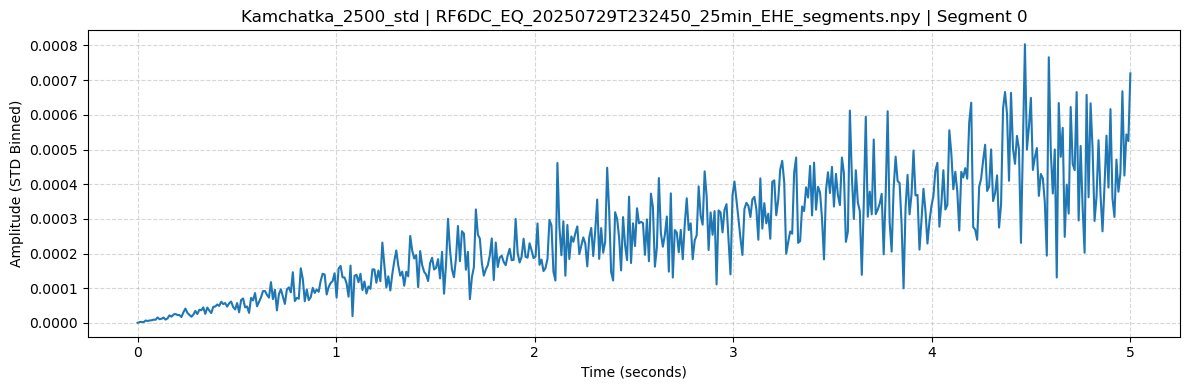

 Saved figure to: figures/view_Kamchatka_2500_std_RF6DC_EQ_20250729T232450_25min_EHE_segments_seg1.png


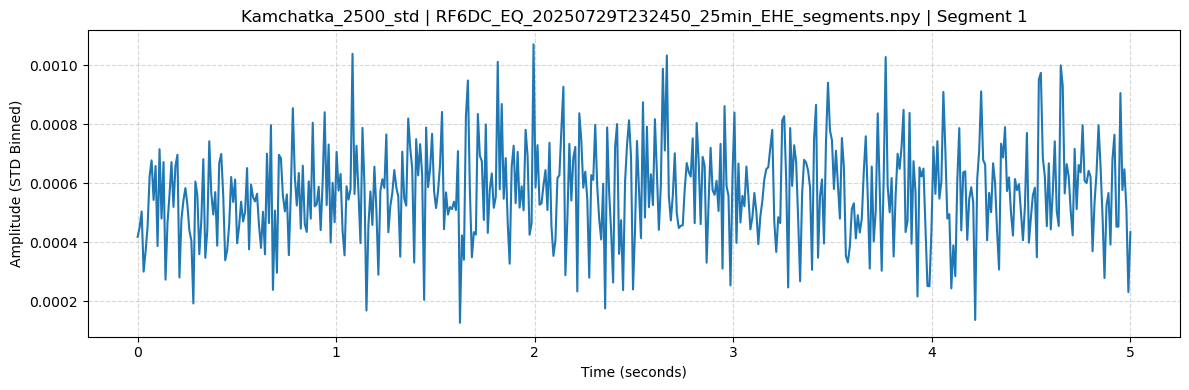

 Saved figure to: figures/view_Kamchatka_2500_std_RF6DC_EQ_20250729T232450_25min_EHE_segments_seg2.png


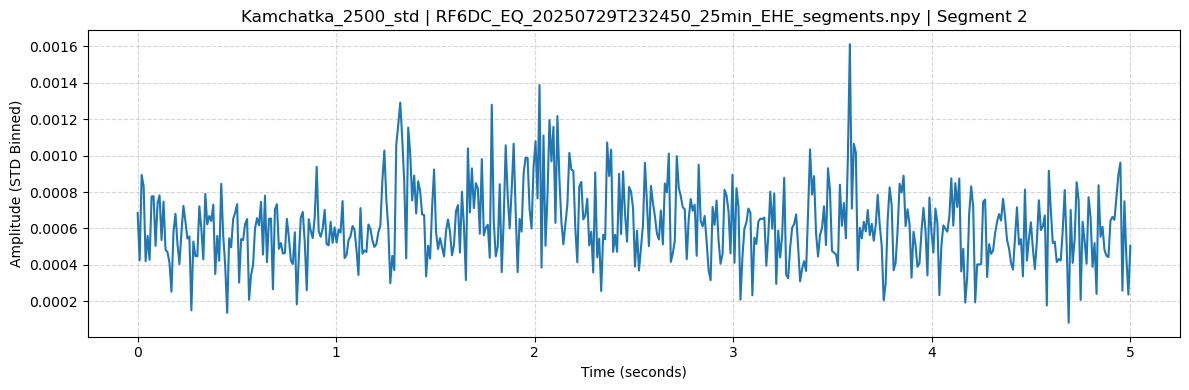

 File: R74A7_EQ_20250729T232450_25min_EHN_segments.npy | Segments: 60
 Saved figure to: figures/view_Kamchatka_2500_std_R74A7_EQ_20250729T232450_25min_EHN_segments_seg0.png


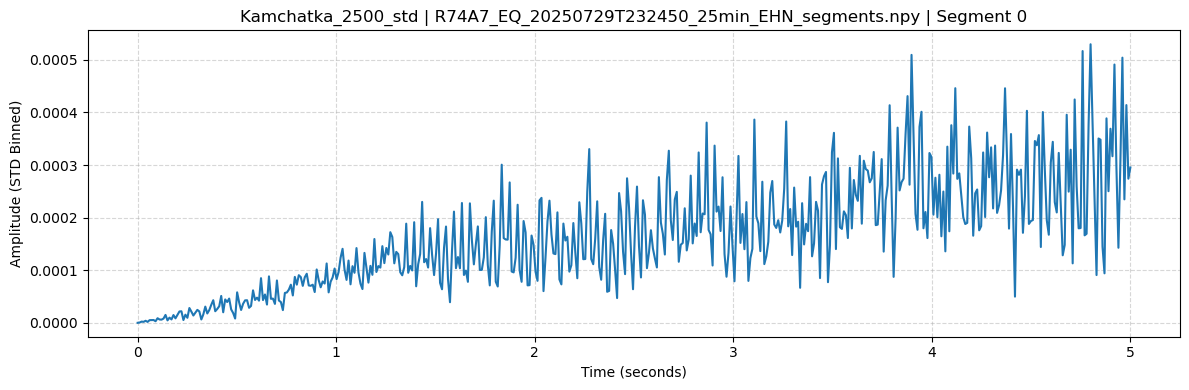

 Saved figure to: figures/view_Kamchatka_2500_std_R74A7_EQ_20250729T232450_25min_EHN_segments_seg1.png


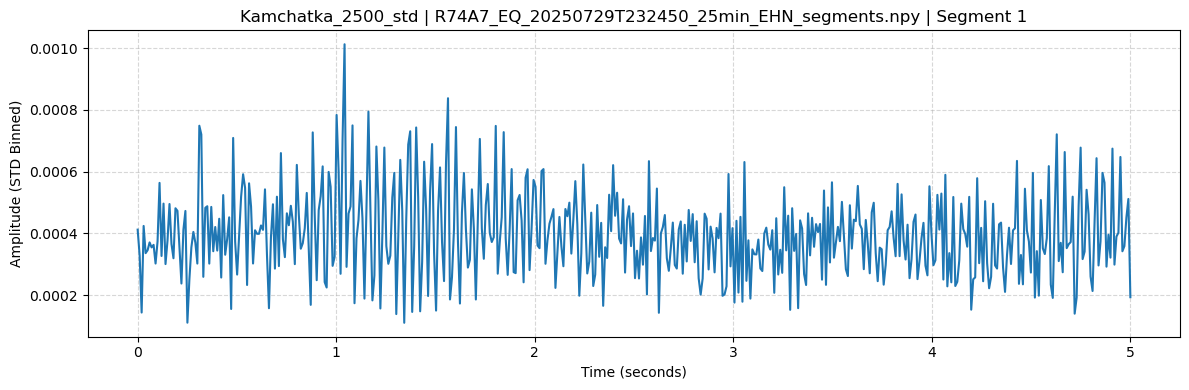

 Saved figure to: figures/view_Kamchatka_2500_std_R74A7_EQ_20250729T232450_25min_EHN_segments_seg2.png


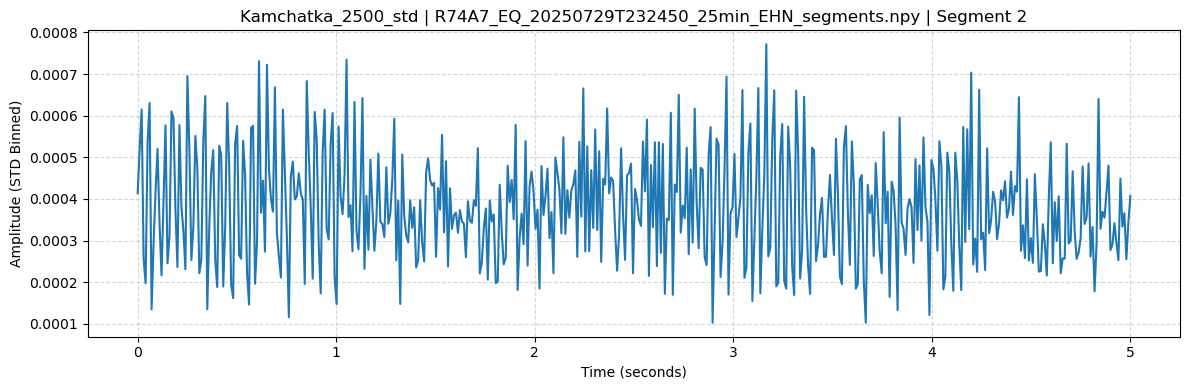


[DrakePassage_2500_std] Found 6 files. Showing 2 random files.

 File: RA0B1_EQ_20250822T021619_25min_EHE_segments.npy | Segments: 60
 Saved figure to: figures/view_DrakePassage_2500_std_RA0B1_EQ_20250822T021619_25min_EHE_segments_seg0.png


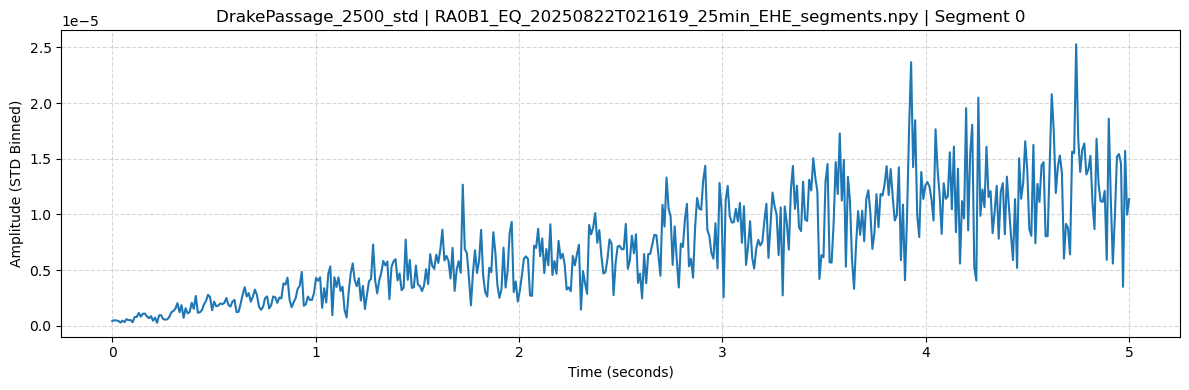

 Saved figure to: figures/view_DrakePassage_2500_std_RA0B1_EQ_20250822T021619_25min_EHE_segments_seg1.png


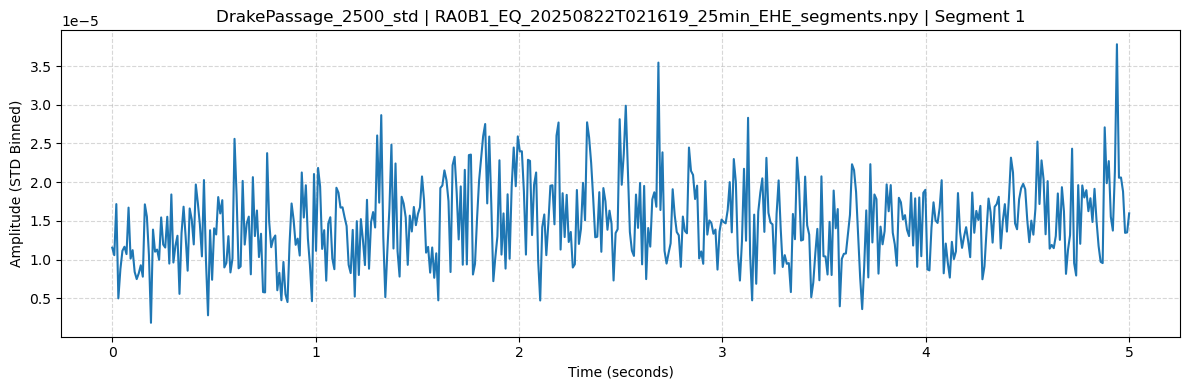

 Saved figure to: figures/view_DrakePassage_2500_std_RA0B1_EQ_20250822T021619_25min_EHE_segments_seg2.png


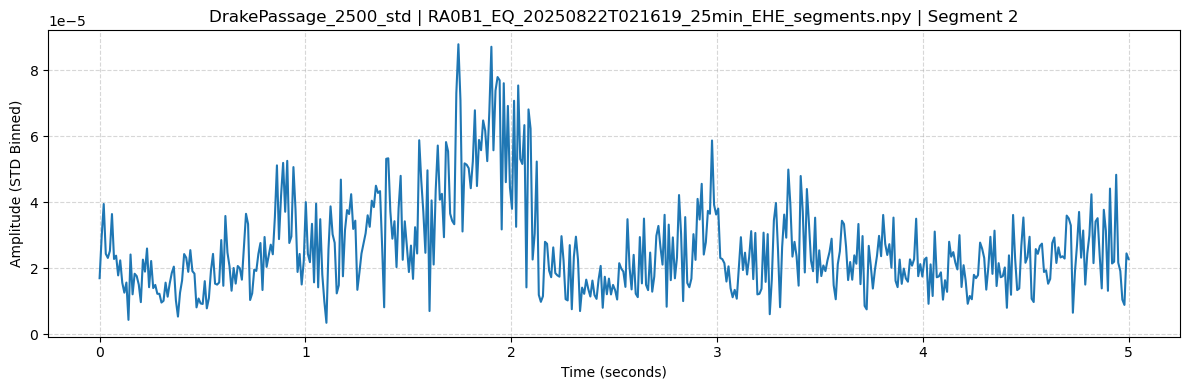

 File: R69C4_EQ_20250822T021619_25min_EHZ_segments.npy | Segments: 60
 Saved figure to: figures/view_DrakePassage_2500_std_R69C4_EQ_20250822T021619_25min_EHZ_segments_seg0.png


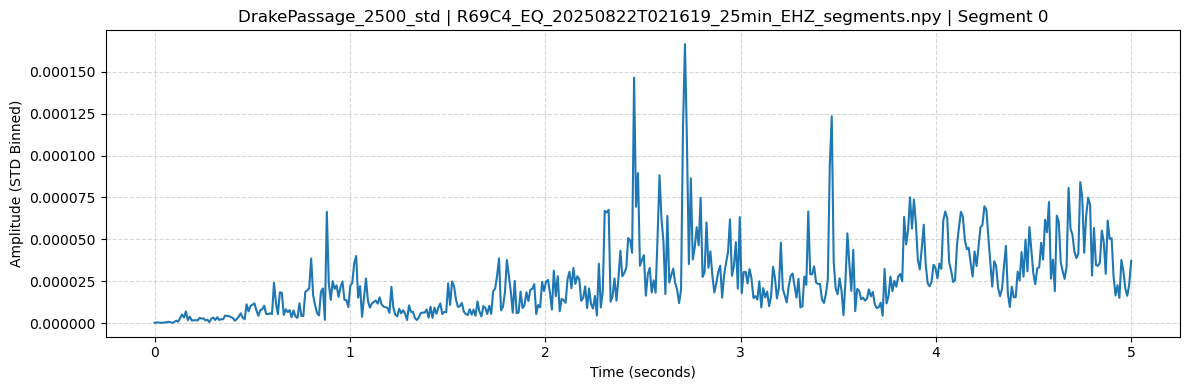

 Saved figure to: figures/view_DrakePassage_2500_std_R69C4_EQ_20250822T021619_25min_EHZ_segments_seg1.png


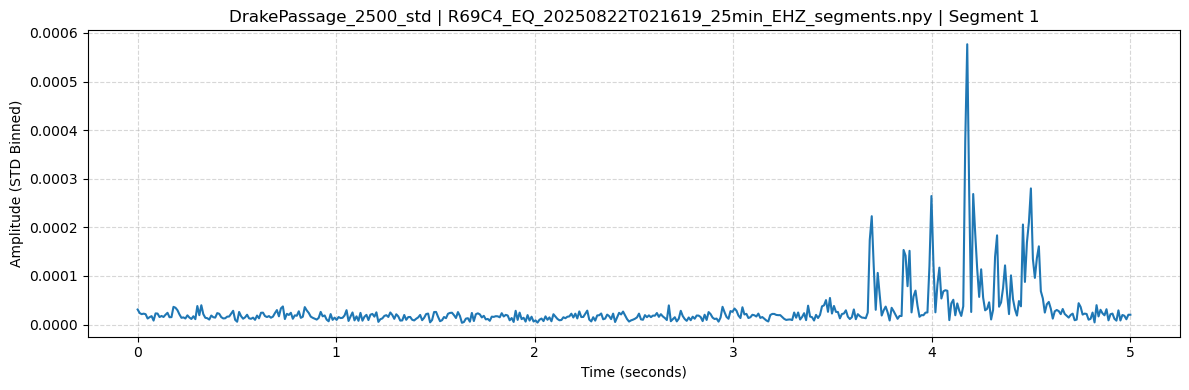

 Saved figure to: figures/view_DrakePassage_2500_std_R69C4_EQ_20250822T021619_25min_EHZ_segments_seg2.png


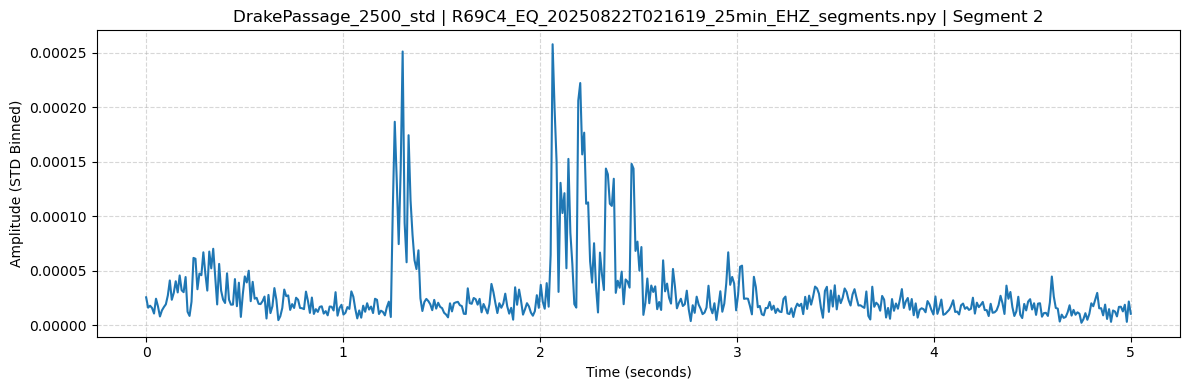

In [94]:
import random

def view_random_eq_segments(folders=["Kamchatka_2500_std", "DrakePassage_2500_std"], 
                            num_files=2, segments_per_file=3):
    """
    Plot a few random std-binned segments from the given EQ folders.
    Uses save_and_show for each plot.
    """
    for folder in folders:
        files = sorted([f for f in os.listdir(folder) if f.endswith(".npy")])
        if not files:
            print(f"⚠️ No .npy files found in {folder}")
            continue

        print(f"\n[{folder}] Found {len(files)} files. Showing {num_files} random files.\n")
        selected_files = random.sample(files, min(num_files, len(files)))

        for fname in selected_files:
            path = os.path.join(folder, fname)
            data = np.load(path)  # shape: (num_segments, 500)

            print(f" File: {fname} | Segments: {data.shape[0]}")
            time_axis = np.linspace(0, 5, 500)  # 5 seconds at 100 Hz
            for i in range(min(segments_per_file, data.shape[0])):
                plt.figure(figsize=(12, 4))
                plt.plot(time_axis, data[i])
                plt.title(f"{folder} | {fname} | Segment {i}")
                plt.xlabel("Time (seconds)")
                plt.ylabel("Amplitude (STD Binned)")
                plt.grid(True, linestyle="--", alpha=0.5)
                plt.tight_layout()
                save_and_show(f"view_{folder}_{fname.replace('.npy', '')}_seg{i}.png")

# Run for both quake datasets
view_random_eq_segments(
    folders=["Kamchatka_2500_std", "DrakePassage_2500_std"], 
    num_files=2, 
    segments_per_file=3
)

#### Autoencoder Evaluation on Earthquake data

##### Load trained Autoencoder to evaluate on Eq segments

In [199]:
from pathlib import Path
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import ( confusion_matrix, classification_report,
    precision_recall_curve, roc_curve, auc)
from tensorflow.keras.models import load_model

# Folders
AE_PATH       = "final_autoencoder_std.keras"
EQ_DIRS       = ["Kamchatka_2500_std", "DrakePassage_2500_std"]
Random_seed   = 42
Test_fraction = 0.20
THR_QUANTILE  = 0.95

def per_segment_z(x500: np.ndarray) -> np.ndarray:
    m = x500.mean(axis=1, keepdims=True)
    s = x500.std(axis=1, keepdims=True) + 1e-8
    return (x500 - m) / s

# Load NOn-EQ Split (already z-normalized earlier)
non_eq_train = np.load("non_eq_X_train.npy").astype("float32")  # 729 x 500
non_eq_test  = np.load("non_eq_X_test.npy").astype("float32")   # 183 x 500
print("Loaded Non-EQ:", non_eq_train.shape, non_eq_test.shape)

Loaded Non-EQ: (729, 500) (183, 500)


##### Collect files and build datasets 

In [201]:
# Build + Split EQ (z-normalize here to mirror training)
def load_all_eq(eq_dirs):
    X_list = []
    for d in eq_dirs:
        for p in Path(d).glob("*.npy"):
            arr = np.load(p)  # (N, 500) std-binned
            X_list.append(arr)
    return np.vstack(X_list) if X_list else np.zeros((0,500), dtype="float32")

X_eq_raw = load_all_eq(EQ_DIRS).astype("float32")
X_eq     = per_segment_z(X_eq_raw).astype("float32")
eq_train, eq_test = train_test_split(X_eq, test_size=Test_fraction,
                                     random_state=Random_seed, shuffle=True)
print("EQ split:", eq_train.shape, eq_test.shape)

# AE Inference: reconstruction error on the necessary sets
ae = load_model(AE_PATH, compile=False)

def recon_err(ae, X):
    Xhat = ae.predict(X, verbose=0)
    return ((X - Xhat)**2).mean(axis=1)

# Threshold from Non-EQ TRAIN 
err_non_tr = recon_err(ae, non_eq_train)
thr_q = np.quantile(err_non_tr, THR_QUANTILE)
print(f"Baseline threshold (q{int(THR_QUANTILE*100)} of Non-EQ train) = {thr_q:.6f}")

# Scores on Test sets
err_non_te = recon_err(ae, non_eq_test)
err_eq_te  = recon_err(ae, eq_test)

# Build combined Test arrays for evaluation
y_true  = np.concatenate([np.zeros_like(err_non_te, dtype=int), np.ones_like(err_eq_te, dtype=int)])
y_score = np.concatenate([err_non_te, err_eq_te])

# Threshold sweep (best F1)
prec, rec, thr_pr = precision_recall_curve(y_true, y_score)
f1s = 2 * prec[:-1] * rec[:-1] / (prec[:-1] + rec[:-1] + 1e-12)
best_i   = int(np.argmax(f1s))
best_thr = float(thr_pr[best_i])

print("\nSweep result (best F1):")
print(f"  best threshold = {best_thr:.6f}")
print(f"  precision = {prec[best_i]:.3f} | recall = {rec[best_i]:.3f} | F1 = {f1s[best_i]:.3f}")

EQ split: (720, 500) (180, 500)
Baseline threshold (q95 of Non-EQ train) = 0.734505

Sweep result (best F1):
  best threshold = 0.737898
  precision = 0.599 | recall = 0.839 | F1 = 0.699


In [ ]:
# Save full sweep table (top rows by F1)

 threshold  precision   recall       F1
  0.737898   0.599206 0.838889 0.699074
  0.733098   0.596078 0.844444 0.698851
  0.739623   0.603239 0.827778 0.697892
  0.705733   0.581481 0.872222 0.697778
  0.736052   0.596838 0.838889 0.697460
  0.732667   0.593750 0.844444 0.697248
  0.712895   0.584906 0.861111 0.696629
  0.743362   0.604082 0.822222 0.696471
  0.739186   0.600806 0.827778 0.696262
  0.703121   0.579336 0.872222 0.696231
  0.737994   0.597610 0.833333 0.696056
  0.735388   0.594488 0.838889 0.695853
  0.730995   0.591440 0.844444 0.695652
  0.721676   0.588462 0.850000 0.695455
  0.719824   0.585551 0.855556 0.695260
  0.712645   0.582707 0.861111 0.695067
  0.707983   0.579926 0.866667 0.694878
  0.739768   0.601626 0.822222 0.694836
  0.698359   0.577206 0.872222 0.694690
  0.738863   0.598394 0.827778 0.694639

Saved: ae_threshold_sweep_f1_table.csv


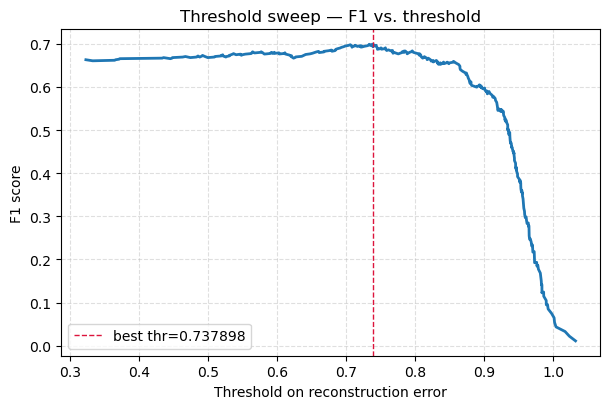

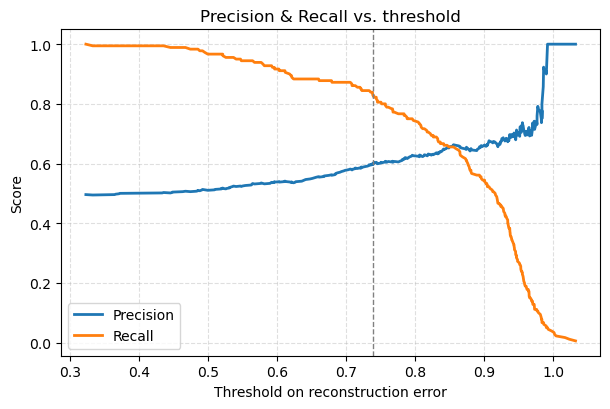


=== Performance @ q95 (thr=0.734505) ===
              precision    recall  f1-score   support

       NonEQ      0.734     0.437     0.548       183
          EQ      0.594     0.839     0.696       180

    accuracy                          0.636       363
   macro avg      0.664     0.638     0.622       363
weighted avg      0.665     0.636     0.621       363



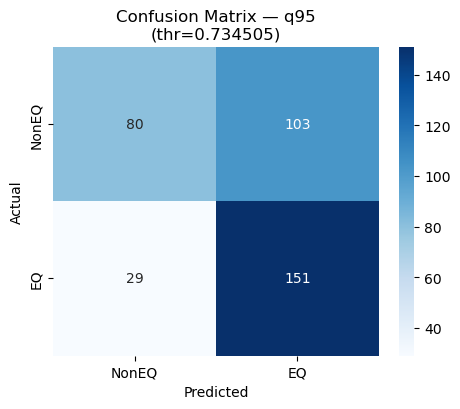


=== Performance @ Best-F1 (thr=0.737898) ===
              precision    recall  f1-score   support

       NonEQ      0.739     0.448     0.558       183
          EQ      0.599     0.839     0.699       180

    accuracy                          0.642       363
   macro avg      0.669     0.643     0.628       363
weighted avg      0.670     0.642     0.628       363



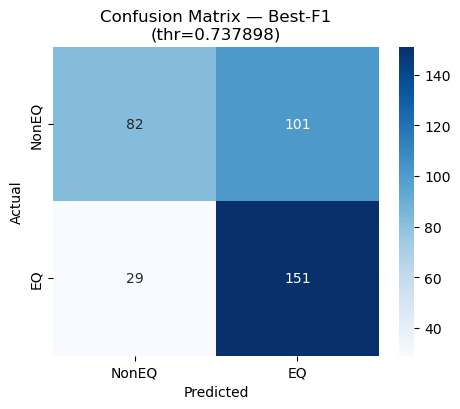

In [205]:
thr_table = pd.DataFrame({
    "threshold": thr_pr,
    "precision": prec[:-1],
    "recall":    rec[:-1],
    "F1":        f1s
}).sort_values("F1", ascending=False).reset_index(drop=True)

TOP_N = 20
print(thr_table.head(TOP_N).to_string(index=False))
thr_table.to_csv("ae_threshold_sweep_f1_table.csv", index=False)
print("\nSaved: ae_threshold_sweep_f1_table.csv")

# Plots: F1 vs thr, PR vs thr
def save_and_show(fname, dpi=170):
    plt.savefig(fname, dpi=dpi, bbox_inches="tight")
    plt.show()

plt.figure(figsize=(6.2, 4.2))
plt.plot(thr_pr, f1s, lw=2)
plt.axvline(best_thr, color="crimson", ls="--", lw=1, label=f"best thr={best_thr:.6f}")
plt.xlabel("Threshold on reconstruction error")
plt.ylabel("F1 score")
plt.title("Threshold sweep — F1 vs. threshold")
plt.grid(True, ls="--", alpha=0.4); plt.legend(); plt.tight_layout()
save_and_show("ae_f1_vs_threshold.png")

plt.figure(figsize=(6.2, 4.2))
plt.plot(thr_pr, prec[:-1], label="Precision", lw=2)
plt.plot(thr_pr, rec[:-1],  label="Recall",    lw=2)
plt.axvline(best_thr, color="gray", ls="--", lw=1)
plt.xlabel("Threshold on reconstruction error")
plt.ylabel("Score")
plt.title("Precision & Recall vs. threshold")
plt.grid(True, ls="--", alpha=0.4); plt.legend(); plt.tight_layout()
save_and_show("ae_precision_recall_vs_threshold.png")

# Confusion Matrics (q95 vs best-F1) + ROC
from sklearn.metrics import roc_auc_score

def eval_and_plot_cm(threshold, label):
    y_pred = (y_score >= threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    rep = classification_report(y_true, y_pred, target_names=["NonEQ","EQ"], digits=3)
    print(f"\n=== Performance @ {label} (thr={threshold:.6f}) ===")
    print(rep)

    plt.figure(figsize=(4.8, 4.2))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["NonEQ","EQ"], yticklabels=["NonEQ","EQ"])
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.title(f"Confusion Matrix — {label}\n(thr={threshold:.6f})")
    plt.tight_layout()
    save_and_show(f"cm_{label.replace(' ','_')}.png")
    return cm

cm_q95  = eval_and_plot_cm(thr_q,  f"q{int(THR_QUANTILE*100)}")
cm_best = eval_and_plot_cm(best_thr, "Best-F1")

ROC-AUC: 0.6907


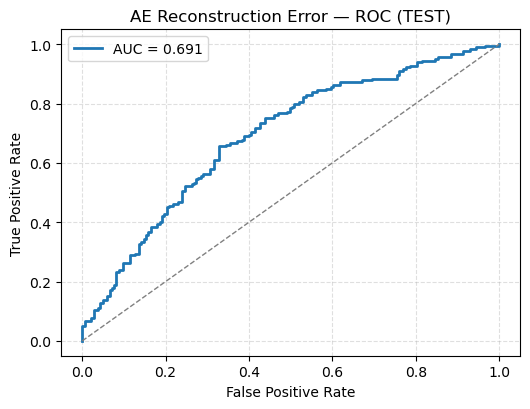

In [207]:
# ROC curve (threshold-free)
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
print("ROC-AUC:", round(roc_auc, 4))

plt.figure(figsize=(5.4, 4.2))
plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "--", color="gray", lw=1)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("AE Reconstruction Error — ROC (TEST)")
plt.legend(); plt.grid(True, ls="--", alpha=0.4); plt.tight_layout()
save_and_show("ae_test_roc.png")

The Autoencoder achieves relatively strong recall (detects EQs), but precision is lower due to false positives. Overall AUC shows moderate discrimination ability

In [212]:
np.save("eq_X_train.npy", eq_train)
np.save("eq_X_test.npy",  eq_test)
print("Saved: eq_X_train.npy, eq_X_test.npy")

Saved: eq_X_train.npy, eq_X_test.npy


##### EQ and Non-EQ error distribution

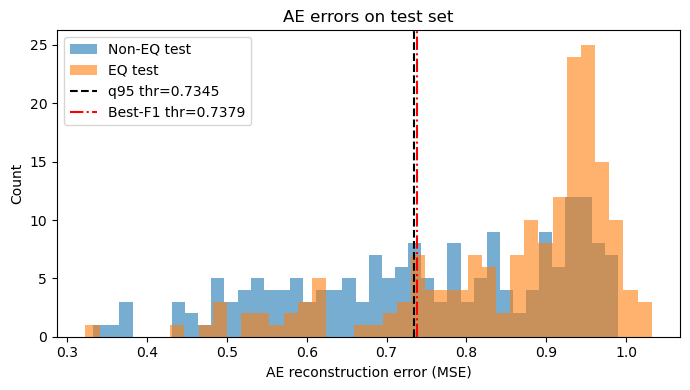

In [214]:
# Histogram on test with both thresholds
plt.figure(figsize=(7,4))
plt.hist(y_score[y_true==0], bins=40, alpha=0.6, label="Non-EQ test")
plt.hist(y_score[y_true==1], bins=40, alpha=0.6, label="EQ test")

# Add both thresholds as vertical lines
plt.axvline(thr_q, color="k", ls="--", lw=1.5, label=f"q95 thr={thr_q:.4f}")
plt.axvline(best_thr, color="red", ls="-.", lw=1.5, label=f"Best-F1 thr={best_thr:.4f}")

plt.xlabel("AE reconstruction error (MSE)")
plt.ylabel("Count")
plt.title("AE errors on test set")
plt.legend()
plt.tight_layout()
save_and_show("ae_test_error_hist_with_thresholds.png")

In [216]:
# Reconstruction Error Statistics (TEST only)

non_err = err_non_te   # reconstruction errors of Non-EQ test set
eq_err  = err_eq_te    # reconstruction errors of EQ test set

print("Reconstruction Error (Non-EQ, TEST):")
print(f"  Mean   = {non_err.mean():.4f}")
print(f"  Median = {np.median(non_err):.4f}")
print(f"  Std    = {non_err.std():.4f}")
print(f"  Min    = {non_err.min():.4f}")
print(f"  Max    = {non_err.max():.4f}")
print()

print("Reconstruction Error (EQ, TEST):")
print(f"  Mean   = {eq_err.mean():.4f}")
print(f"  Median = {np.median(eq_err):.4f}")
print(f"  Std    = {eq_err.std():.4f}")
print(f"  Min    = {eq_err.min():.4f}")
print(f"  Max    = {eq_err.max():.4f}")
print()

# Comparison
print("Error ratio (EQ mean / Non-EQ mean):", round(eq_err.mean() / non_err.mean(), 2))

Reconstruction Error (Non-EQ, TEST):
  Mean   = 0.7496
  Median = 0.7658
  Std    = 0.1690
  Min    = 0.3324
  Max    = 0.9898

Reconstruction Error (EQ, TEST):
  Mean   = 0.8549
  Median = 0.9145
  Std    = 0.1398
  Min    = 0.3225
  Max    = 1.0322

Error ratio (EQ mean / Non-EQ mean): 1.14


EQ windows generally show higher reconstruction errors than Non-EQ, but the distributions overlap significantly, making perfect separation impossible with a single threshold.

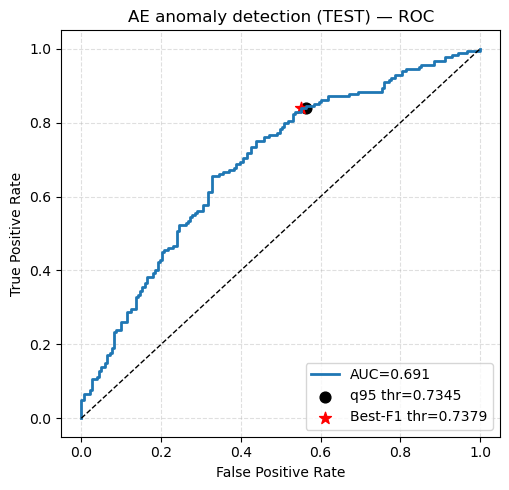

In [218]:
# ROC with both thresholds marked 
fpr, tpr, thr_values = roc_curve(y_true, y_score)
auc_val = roc_auc_score(y_true, y_score)

plt.figure(figsize=(5.2,5.0))
plt.plot(fpr, tpr, lw=2, label=f"AUC={auc_val:.3f}")
plt.plot([0,1],[0,1], "k--", lw=1)

# Locate the FPR/TPR corresponding to thresholds
def get_coords(threshold):
    # find closest index in thr_values
    idx = np.argmin(np.abs(thr_values - threshold))
    return fpr[idx], tpr[idx]

fpr_q, tpr_q   = get_coords(thr_q)
fpr_best, tpr_best = get_coords(best_thr)

plt.scatter(fpr_q, tpr_q, marker="o", color="black", s=60, label=f"q95 thr={thr_q:.4f}")
plt.scatter(fpr_best, tpr_best, marker="*", color="red", s=80, label=f"Best-F1 thr={best_thr:.4f}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AE anomaly detection (TEST) — ROC")
plt.legend(loc="lower right")
plt.grid(True, ls="--", alpha=0.4)
plt.tight_layout()
save_and_show("ae_test_roc_with_thresholds.png")

##### t-SNE of EQ vs Non-EQ using AE bottleneck

In [220]:
from tensorflow.keras import Model
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load trained AE
ae = load_model(AE_PATH, compile=False)

ae.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                │ (None, 128)            │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 500)            │        64,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145,204 (567.20 KB)

 Trainable params: 145,204 (567.20 KB)

 Non-trainable params: 0 (0.00 B)

In [224]:
from tensorflow.keras import Model, layers

# Build an encoder from the first two Dense layers in the AE
# The AE is Sequential: layers[0] = Dense(64), layers[1] = Dense(64)  (bottleneck)
enc_in = layers.Input(shape=(500,), name="enc_input_500")
h1 = ae.layers[0](enc_in)     # reuse weights of first Dense
z  = ae.layers[1](h1)         # reuse weights of second Dense  <-- 64-D bottleneck
encoder = Model(enc_in, z, name="encoder_from_ae")
print("Encoder ready. Output shape:", encoder.output_shape)

# Get latent features for TEST sets
Z_non = encoder.predict(non_eq_test, verbose=0)   # (183, 64)
Z_eq  = encoder.predict(eq_test,      verbose=0)  # (180, 64)

# Combine for visualization/metrics
Z = np.vstack([Z_non, Z_eq])
y = np.concatenate([np.zeros(len(Z_non), dtype=int),
                    np.ones(len(Z_eq),  dtype=int)])
print("Latent features:", Z.shape)

# Quantify separation directly in 64-D space
from sklearn.metrics import silhouette_score
try:
    sil_latent = silhouette_score(Z, y, metric="euclidean")
except Exception:
    sil_latent = np.nan
print(f"Silhouette in 64-D latent space: {sil_latent:.3f}")

Encoder ready. Output shape: (None, 64)
Latent features: (363, 64)
Silhouette in 64-D latent space: 0.012


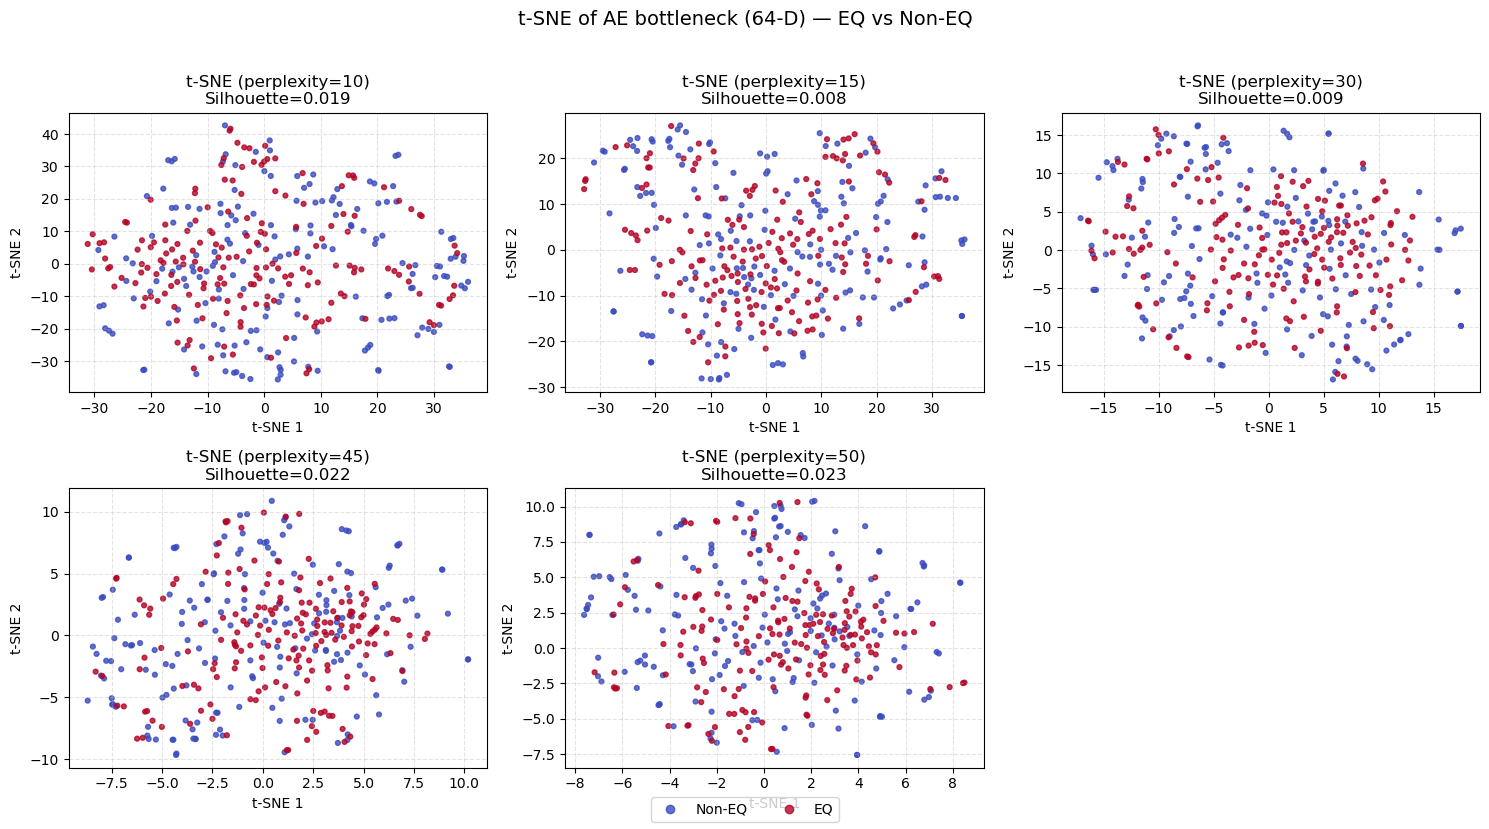

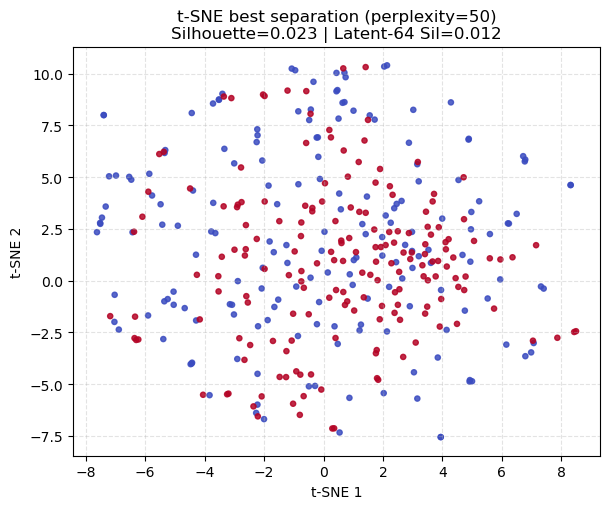

In [230]:
from sklearn.manifold import TSNE

perps = [10, 15, 30, 45, 50]
tsne_results, sil_tsne = {}, {}

for p in perps:
    tsne = TSNE(n_components=2, perplexity=p, random_state=42, init="pca")
    Z2 = tsne.fit_transform(Z)
    tsne_results[p] = Z2
    try:
        sil_tsne[p] = silhouette_score(Z2, y)
    except Exception:
        sil_tsne[p] = np.nan

# Plot grid
cols = 3
rows = int(np.ceil(len(perps)/cols))
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), squeeze=False)

for ax, p in zip(axes.ravel(), perps):
    Z2 = tsne_results[p]
    sc = ax.scatter(Z2[:,0], Z2[:,1], c=y, cmap="coolwarm", s=12, alpha=0.8)
    ax.set_title(f"t-SNE (perplexity={p})\nSilhouette={sil_tsne[p]:.3f}")
    ax.set_xlabel("t-SNE 1"); ax.set_ylabel("t-SNE 2")
    ax.grid(ls="--", alpha=0.35)

for ax in axes.ravel()[len(perps):]:
    ax.axis("off")

handles, _ = sc.legend_elements()
fig.legend(handles, ["Non-EQ","EQ"], loc="lower center", ncol=2, frameon=True)
fig.suptitle("t-SNE of AE bottleneck (64-D) — EQ vs Non-EQ", y=1.02, fontsize=14)
fig.tight_layout()
fig.savefig("tsne_gride_KamC.png", dpi=170, bbox_inches="tight")
plt.show()

# Best perplexity view
best_p = max(perps, key=lambda p: sil_tsne[p] if not np.isnan(sil_tsne[p]) else -1)
Z2_best = tsne_results[best_p]

fig2=plt.figure(figsize=(6.2,5.2))
ax2 = fig2.add_subplot(111)
ax2.scatter(Z2_best[:,0], Z2_best[:,1], c=y, cmap="coolwarm", s=14, alpha=0.85)
ax2.set_title(f"t-SNE best separation (perplexity={best_p})\nSilhouette={sil_tsne[best_p]:.3f} | Latent-64 Sil={sil_latent:.3f}")
ax2.set_xlabel("t-SNE 1"); ax2.set_ylabel("t-SNE 2")
ax2.grid(ls="--", alpha=0.35)
fig2.tight_layout()
fig2.savefig("tsne_best_KamC.png", dpi=170, bbox_inches="tight")
plt.show()

#### Train RandomForest

Train: (290, 64) Test: (73, 64)


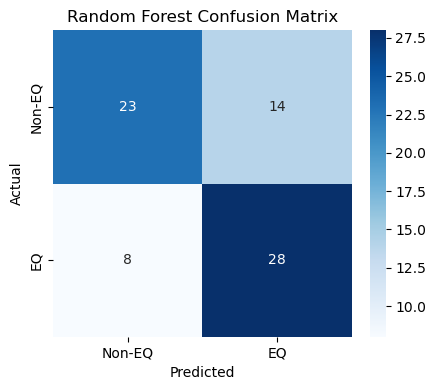


Classification Report:
               precision    recall  f1-score   support

           0      0.742     0.622     0.676        37
           1      0.667     0.778     0.718        36

    accuracy                          0.699        73
   macro avg      0.704     0.700     0.697        73
weighted avg      0.705     0.699     0.697        73

ROC-AUC: 0.749


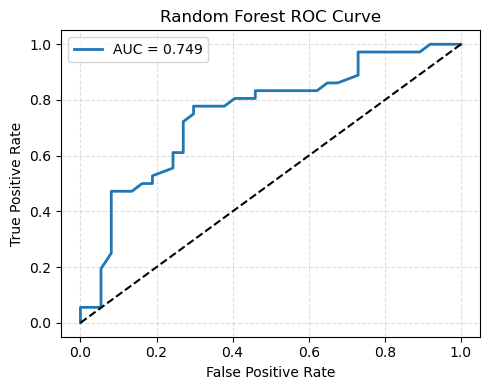

In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import seaborn as sns


# Prepare data

# Use latent features from encoder
X = Z      # (num_samples, 64)
y = y      # (num_samples,) 0=Non-EQ, 1=EQ

# Train/test split (stratified so EQ/NonEQ balance preserved)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train:", X_train.shape, "Test:", X_test.shape)


# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=300,   # number of trees
    max_depth=None,     # allow full depth
    class_weight="balanced",  # adjust for EQ/NonEQ imbalance
    random_state=7,
    n_jobs=-1)

rf.fit(X_train, y_train)

# Evaluation
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]  # probability for EQ

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4.5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=["Non-EQ","EQ"],yticklabels=["Non-EQ","EQ"])
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
save_and_show("Random_Forest_Confusion_Matrix_KamC.png")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc:.3f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.grid(ls="--", alpha=0.4)
plt.tight_layout()
save_and_show("Random_Forest_ROC_Curve_KamC.png")

##### Run t-SNE from RF (X_test)

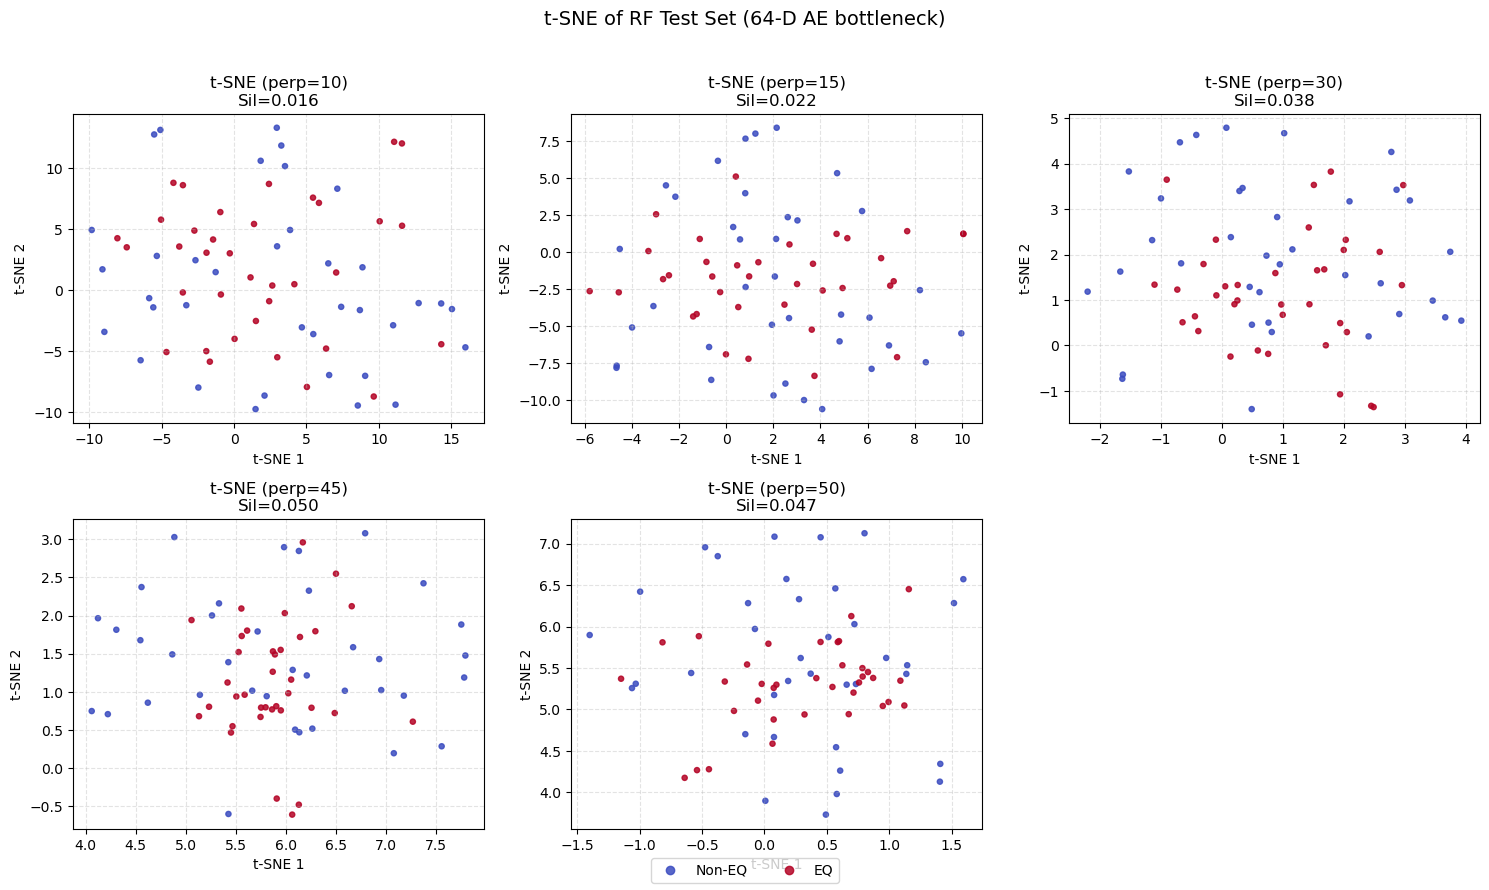

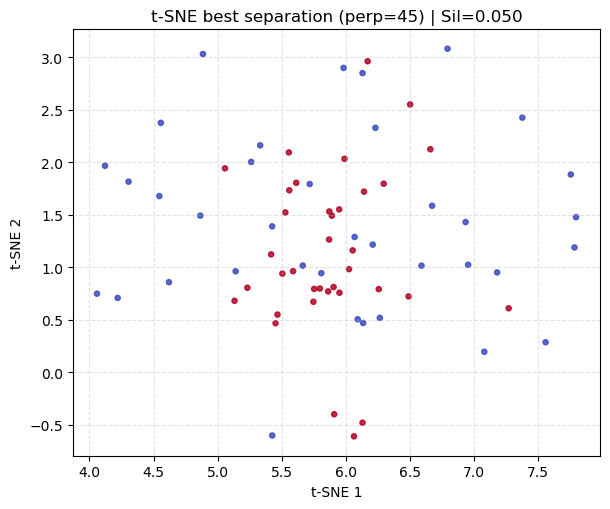

In [242]:
# Run t-SNE on the same test set RF was evaluated on
perps = [10, 15, 30, 45, 50]
tsne_results = {}
sil_tsne = {}

for p in perps:
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    Z2 = tsne.fit_transform(X_test)   # RF test set
    tsne_results[p] = Z2
    try:
        sil_tsne[p] = silhouette_score(Z2, y_test, metric="euclidean")
    except Exception as e:
        sil_tsne[p] = np.nan
        print(f"[WARN] silhouette failed for perplexity={p}: {e}")

# Plot grid
n = len(perps)
cols = 3
rows = int(np.ceil(n/cols))

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4.3*rows), squeeze=False)
for ax, p in zip(axes.ravel(), perps):
    Z2 = tsne_results[p]
    sc = ax.scatter(Z2[:,0], Z2[:,1], c=y_test, cmap="coolwarm", s=14, alpha=0.85)
    ax.set_title(f"t-SNE (perp={p})\nSil={sil_tsne[p]:.3f}")
    ax.set_xlabel("t-SNE 1"); ax.set_ylabel("t-SNE 2")
    ax.grid(ls="--", alpha=0.35)

# Hide unused subplots
for ax in axes.ravel()[len(perps):]:
    ax.axis("off")

handles, _ = sc.legend_elements()
fig.legend(handles, ["Non-EQ","EQ"], loc="lower center", ncol=2, frameon=True)
fig.suptitle("t-SNE of RF Test Set (64-D AE bottleneck)", y=1.02, fontsize=14)
fig.tight_layout()
save_and_show("t-SNE_of_RF_Test_Set_KamC.png")

# Best perplexity view
best_p = max(perps, key=lambda p: sil_tsne[p] if not np.isnan(sil_tsne[p]) else -1)
Z2_best = tsne_results[best_p]

plt.figure(figsize=(6.2,5.2))
plt.scatter(Z2_best[:,0], Z2_best[:,1], c=y_test, cmap="coolwarm", s=14, alpha=0.85)
plt.title(f"t-SNE best separation (perp={best_p}) | Sil={sil_tsne[best_p]:.3f}")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.grid(ls="--", alpha=0.35)
plt.tight_layout()
save_and_show("t-SNE_best_RF_separation_KamC.png")

Adding a classifier slightly improved AUC, but results are consistent: EQ vs Non-EQ are only partially separable in latent space.

The potential from this analysis is the Autoencoder can detect anomalies, and EQs tend to have higher reconstruction errors.

The limitation noticed is overlap between EQ and Non-EQ error distributions prevents clean separation.

The classifier insight shows that even with a Random Forest on latent features, separability remains modest (AUC, apprx.0.75). Adding a classifier slightly improved AUC, but results are consistent: EQ vs Non-EQ are only partially separable in latent space.

To Conclude, for Kamchatka and Drake Passage data, the Autoencoder shows useful anomaly detection ability, but precision–recall tradeoffs and overlapping distributions highlight the challenges of using a single unsupervised AE for robust earthquake detection.